# PROJECT 1 - COLOR COMPRESSION 
### NGUYỄN QUỐC HUY - 21127511

## Import libary

In [62]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time 

## Find closest centroids for each pixel

In [63]:
def find_closest_centroids(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

## Calculate centroids after each update

In [64]:
def calculate_centroids(X, labels, k_clusters):
    centroids = np.array([np.mean(X[labels == i], axis=0) if np.any(labels == i) else np.zeros(X.shape[1]) for i in range(k_clusters)])
    return centroids

## Kmeans function

In [65]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    centroid_history = []
    centroids = init_centroids
    for _ in range(max_iter):
        centroid_history.append(centroids)
        labels = find_closest_centroids(img_1d, centroids)
        centroids = calculate_centroids(img_1d, labels, k_clusters)
        if np.allclose(centroid_history[-1], centroids, atol= 0.1):
            print("Iter (number of repeat time):", _ + 1)
            return labels, centroid_history
    return labels, centroid_history


## Random Initialization functions

In [66]:
def choose_in_pixels_centroids(X, k_clusters):
    random_indices = np.random.choice(range(X.shape[0]), size=k_clusters, replace=False)
    return X[random_indices]

In [67]:
def choose_random_centroids(X, k_clusters):
    centroids = np.random.randint(0, 256, size=(k_clusters, X.shape[1]))
    return centroids

## Some other feature functions

In [68]:
def input_information():
    image_file = input("Input image file: ")
    
    # Kiểm tra và xử lý k_clusters
    k_clusters = input("Input k clusters: ")
    if not k_clusters.isdigit():
        print("Invalid input for k clusters. Setting default value to 3.")
        k_clusters = 3
    else:
        k_clusters = int(k_clusters)
    
    # Kiểm tra và xử lý max_iter
    max_iter = input("Input max iterator: ")
    if not max_iter.isdigit():
        print("Invalid input for max iterator. Setting default value to 300.")
        max_iter = 300
    else:
        max_iter = int(max_iter)
    
    init_centroids = input("Input init centroids type (random/in_pixels): ")
    if init_centroids != "random" and init_centroids != "in_pixels":
        print("Invalid input for init centroids. Setting default value to random.")
        init_centroids = "random"
    
    output_format = input("Input the output image extension (pdf/png): ")
    if output_format != "pdf" and output_format != "png":
        print("Invalid input for output image extension. Setting default value to png.")
        output_format = "png"
    
    return image_file, k_clusters, max_iter, init_centroids, output_format


In [69]:
def print_image_information(image_file):
    try:
        # Đọc hình ảnh
        image = Image.open(image_file)

        # Lấy thông tin hình ảnh
        image_shape = image.size
        image_width, image_height = image.size
        num_channels = len(image.getbands())
        image_dtype = image.mode
        image_size = image_height* image_width

        # In thông tin hình ảnh
        print("ORIGINAL IMAGE INFORMATION")
        print("Image shape:", image_shape)
        # print("Image size: ", image_size, " bytes")
        print("Image width:", image_width, " pixels")
        print("Image height:", image_height, " pixels")
        print("Image dimension:", num_channels)
        print("Image type:", image_dtype)
    except IOError:
        print("Can not read image")

In [70]:
def image_handler(image_file, k_clusters, max_iter = 300, init_centroids = 'random'):
# Đọc ảnh và chuyển thành mảng numpy
    image = Image.open(image_file)
    image_np = np.array(image)

    # Chuyển đổi ảnh thành 1D array
    img_1d = image_np.reshape(-1, 3) / 255  # Reshape và chuẩn hóa giá trị [0, 1]

    # Thực hiện K-Means
    if init_centroids == 'random':
        initial_centroids = choose_random_centroids(img_1d, k_clusters)
    if init_centroids == 'in_pixels':
        initial_centroids = choose_in_pixels_centroids(img_1d, k_clusters)
    start_time = time.time()
    labels, centroid_history = kmeans(img_1d, k_clusters, max_iter, initial_centroids)
    end_time = time.time()
    # Tạo ảnh mới từ các centroid và nhãn
    final_centroids = centroid_history[-1]
    final_image = final_centroids[labels].reshape(image_np.shape)

    # Hiển thị ảnh gốc và ảnh sau khi giảm số lượng màu
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].set_title("Original Image")
    axs[0].imshow(image_np)
    axs[0].axis('off')
    axs[1].set_title(f"Reduced Image (k={k_clusters}, iter={max_iter}, init={init_centroids})")
    axs[1].imshow(final_image)
    axs[1].axis('off')
    plt.show()
    print("Run time: ", end_time - start_time)
    print("Final centroid: ", final_centroids * 255)
    print("Centroid_history: ", centroid_history)
    print("Labels: ", labels)
    return final_image

In [71]:
def save_image(final_image, output_format = "output.png"):
    # Lưu ảnh đầu ra
    if output_format == "png":
        output_file = "output.png"
    elif output_format == "pdf":
        output_file = "output.pdf"
    Image.fromarray((final_image * 255).astype(np.uint8)).save(output_file)
    
    print("Save output image successfully!")


## General Program 

In [72]:
def main():
    image_file, k_clusters, max_iter, init_centroids, output_format = input_information()
    print_image_information(image_file)
    final_image = image_handler(image_file, k_clusters, max_iter, init_centroids)
    save_image(final_image, output_format)

## Simplicity
Run all the first time then the program will run by just click run the last cell

Invalid input for k clusters. Setting default value to 3.
Invalid input for max iterator. Setting default value to 300.
Invalid input for init centroids. Setting default value to random.
Invalid input for output image extension. Setting default value to png.
ORIGINAL IMAGE INFORMATION
Image shape: (1000, 562)
Image width: 1000  pixels
Image height: 562  pixels
Image dimension: 3
Image type: RGB
Iter (number of repeat time): 3


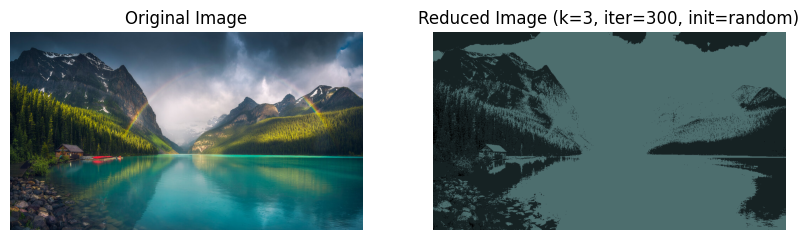

Run time:  0.6727399826049805
Final centroid:  [[ 77.61401543 110.30930818 110.90390078]
 [ 22.84255124  34.45446926  35.95067455]
 [  0.           0.           0.        ]]
Centroid_history:  [array([[112, 126,   0],
       [199,  86,  87],
       [250,  95, 128]]), array([[0.27108196, 0.38648562, 0.3893653 ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]]), array([[0.30436869, 0.43258552, 0.43491726],
       [0.08957863, 0.13511557, 0.14098304],
       [0.        , 0.        , 0.        ]])]
Labels:  [1 1 1 ... 0 0 0]
Save output image successfully!


In [73]:
if __name__ == "__main__":
    main()